'Before Filtering the shape (523906, 47)'

'After Filter the shape (28210, 47)'

'Desire Filter shape (28210, 29)'

Schema([('Kerosene_ration_card', Int16),
        ('LPG_subsidy_received', Int16),
        ('LPG_subsidized_cylinders', Int16),
        ('Free_electricity', Int16),
        ('Any_member_attended_school', Int16),
        ('Num_govt_school_attended', Int16),
        ('Num_private_school_attended', Int16),
        ('Free_textbooks_received', Int16),
        ('Total_textbooks', Int16),
        ('Free_stationery_received', Int16),
        ('Total_stationery', Int16),
        ('Free_school_bag_received', Int16),
        ('Total_school_bags', Int16),
        ('Free_other_items_received', Int16),
        ('Total_other_items', Int16),
        ('Fee_waiver_received', Int16),
        ('Num_fee_waiver_received', Int16),
        ('Ayushman_beneficiary', Int16),
        ('Num_ayushman_beneficiaries', Int16),
        ('Hospitalization_case', Int16),
        ('Medical_benefit_received', Int16),
        ('Num_medical_beneficiaries', Int16),
        ('Medical_benefit_amount', Int16),
        ('Online_pur

Percentage of null values 
Kerosene_ration_card ---> 0.00%
LPG_subsidy_received ---> 0.00%
LPG_subsidized_cylinders ---> 76.18%
Free_electricity ---> 0.00%
Any_member_attended_school ---> 0.00%
Num_govt_school_attended ---> 58.36%
Num_private_school_attended ---> 56.59%
Free_textbooks_received ---> 74.19%
Total_textbooks ---> 74.19%
Free_stationery_received ---> 99.65%
Total_stationery ---> 99.65%
Free_school_bag_received ---> 99.77%
Total_school_bags ---> 99.77%
Free_other_items_received ---> 96.19%
Total_other_items ---> 96.19%
Fee_waiver_received ---> 44.10%
Num_fee_waiver_received ---> 90.91%
Ayushman_beneficiary ---> 0.00%
Num_ayushman_beneficiaries ---> 55.31%
Hospitalization_case ---> 0.00%
Medical_benefit_received ---> 86.09%
Num_medical_beneficiaries ---> 98.48%
Medical_benefit_amount ---> 98.96%
Online_purchase_fuel_light ---> 83.91%
Online_purchase_toilet_articles ---> 97.72%
Online_purchase_education ---> 98.88%
Online_purchase_medicine ---> 98.80%
Online_purchase_services 

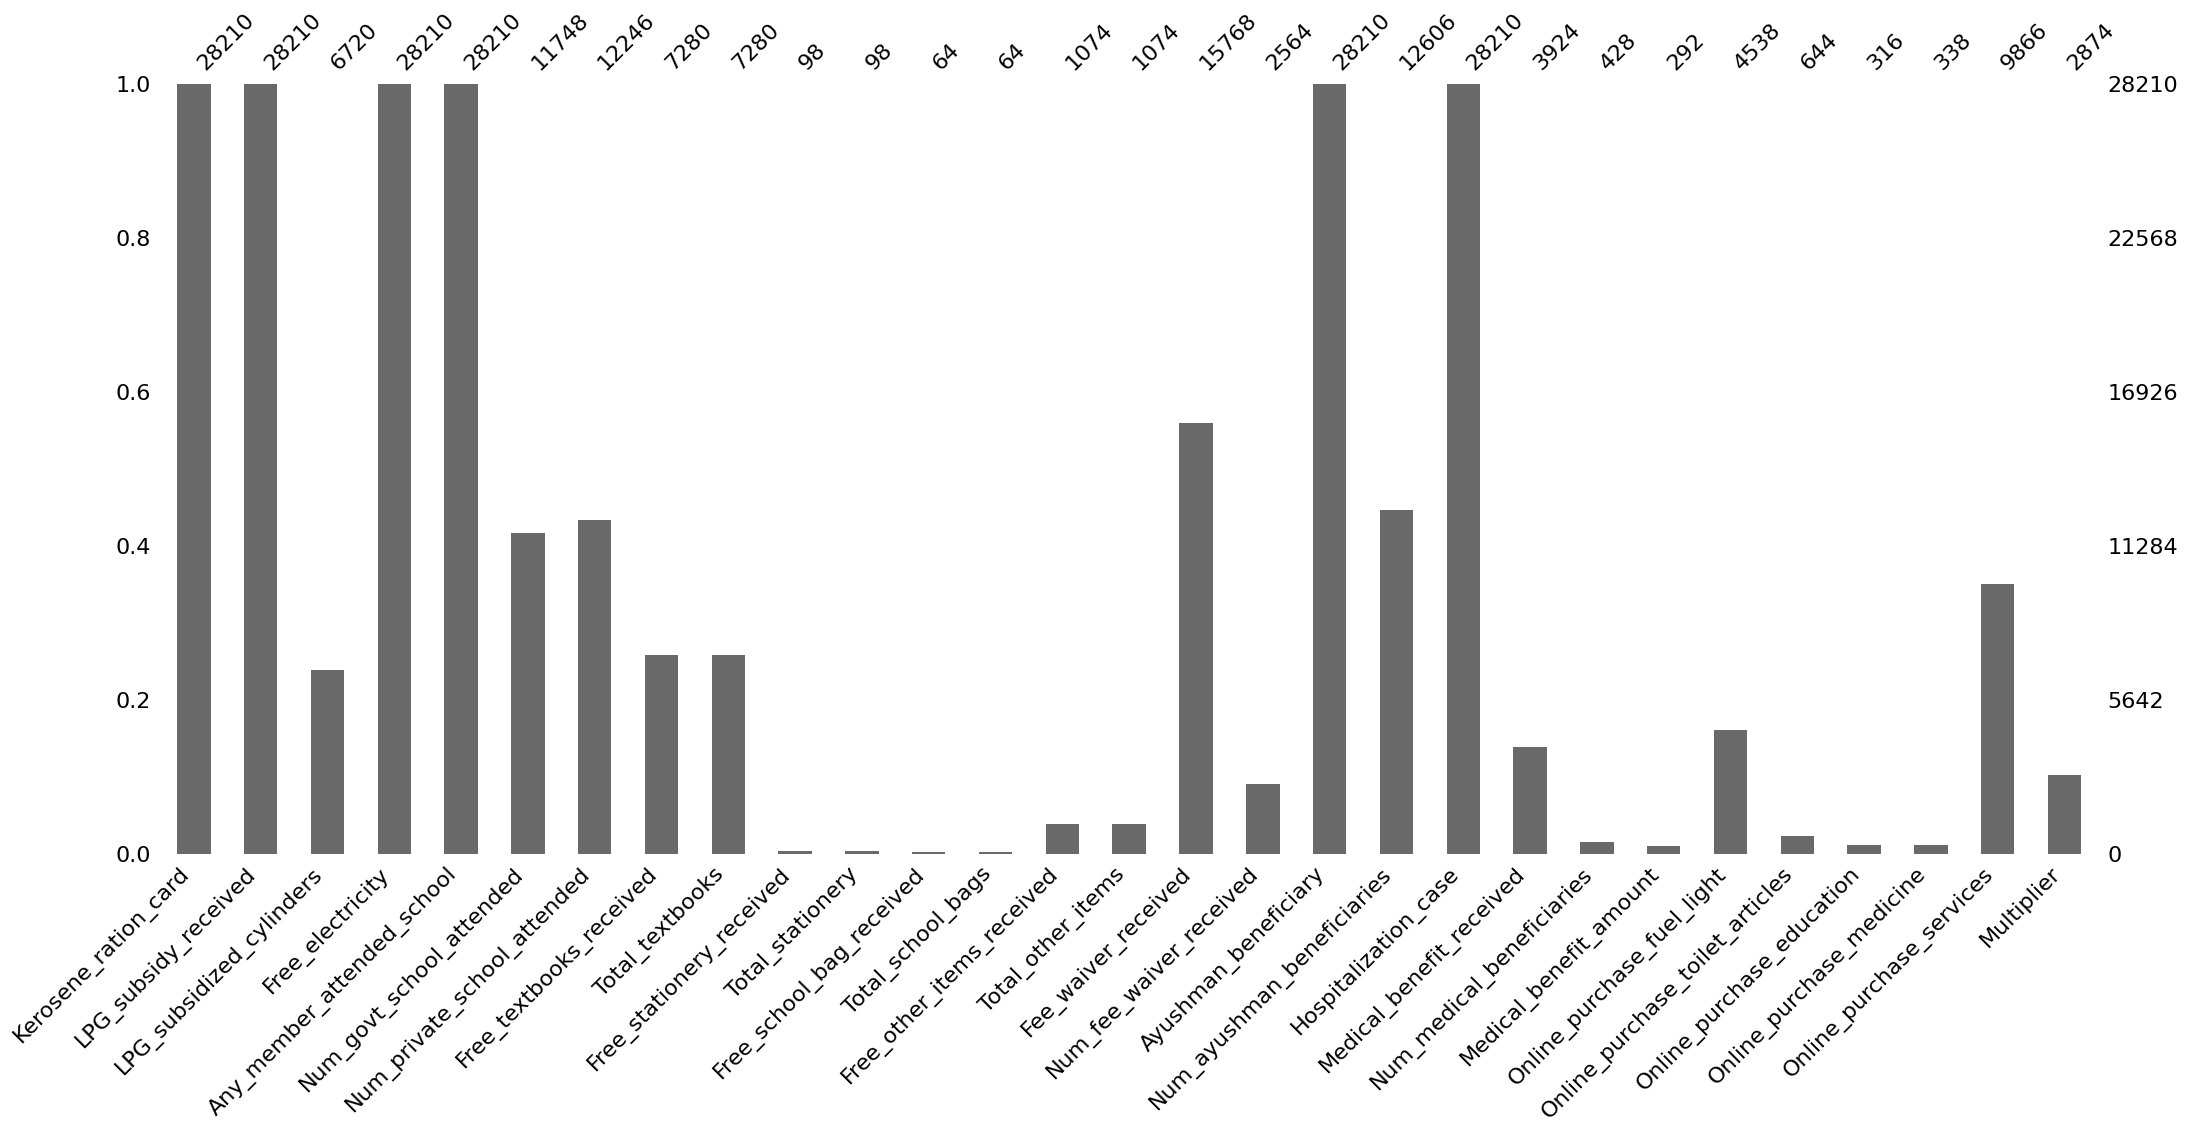

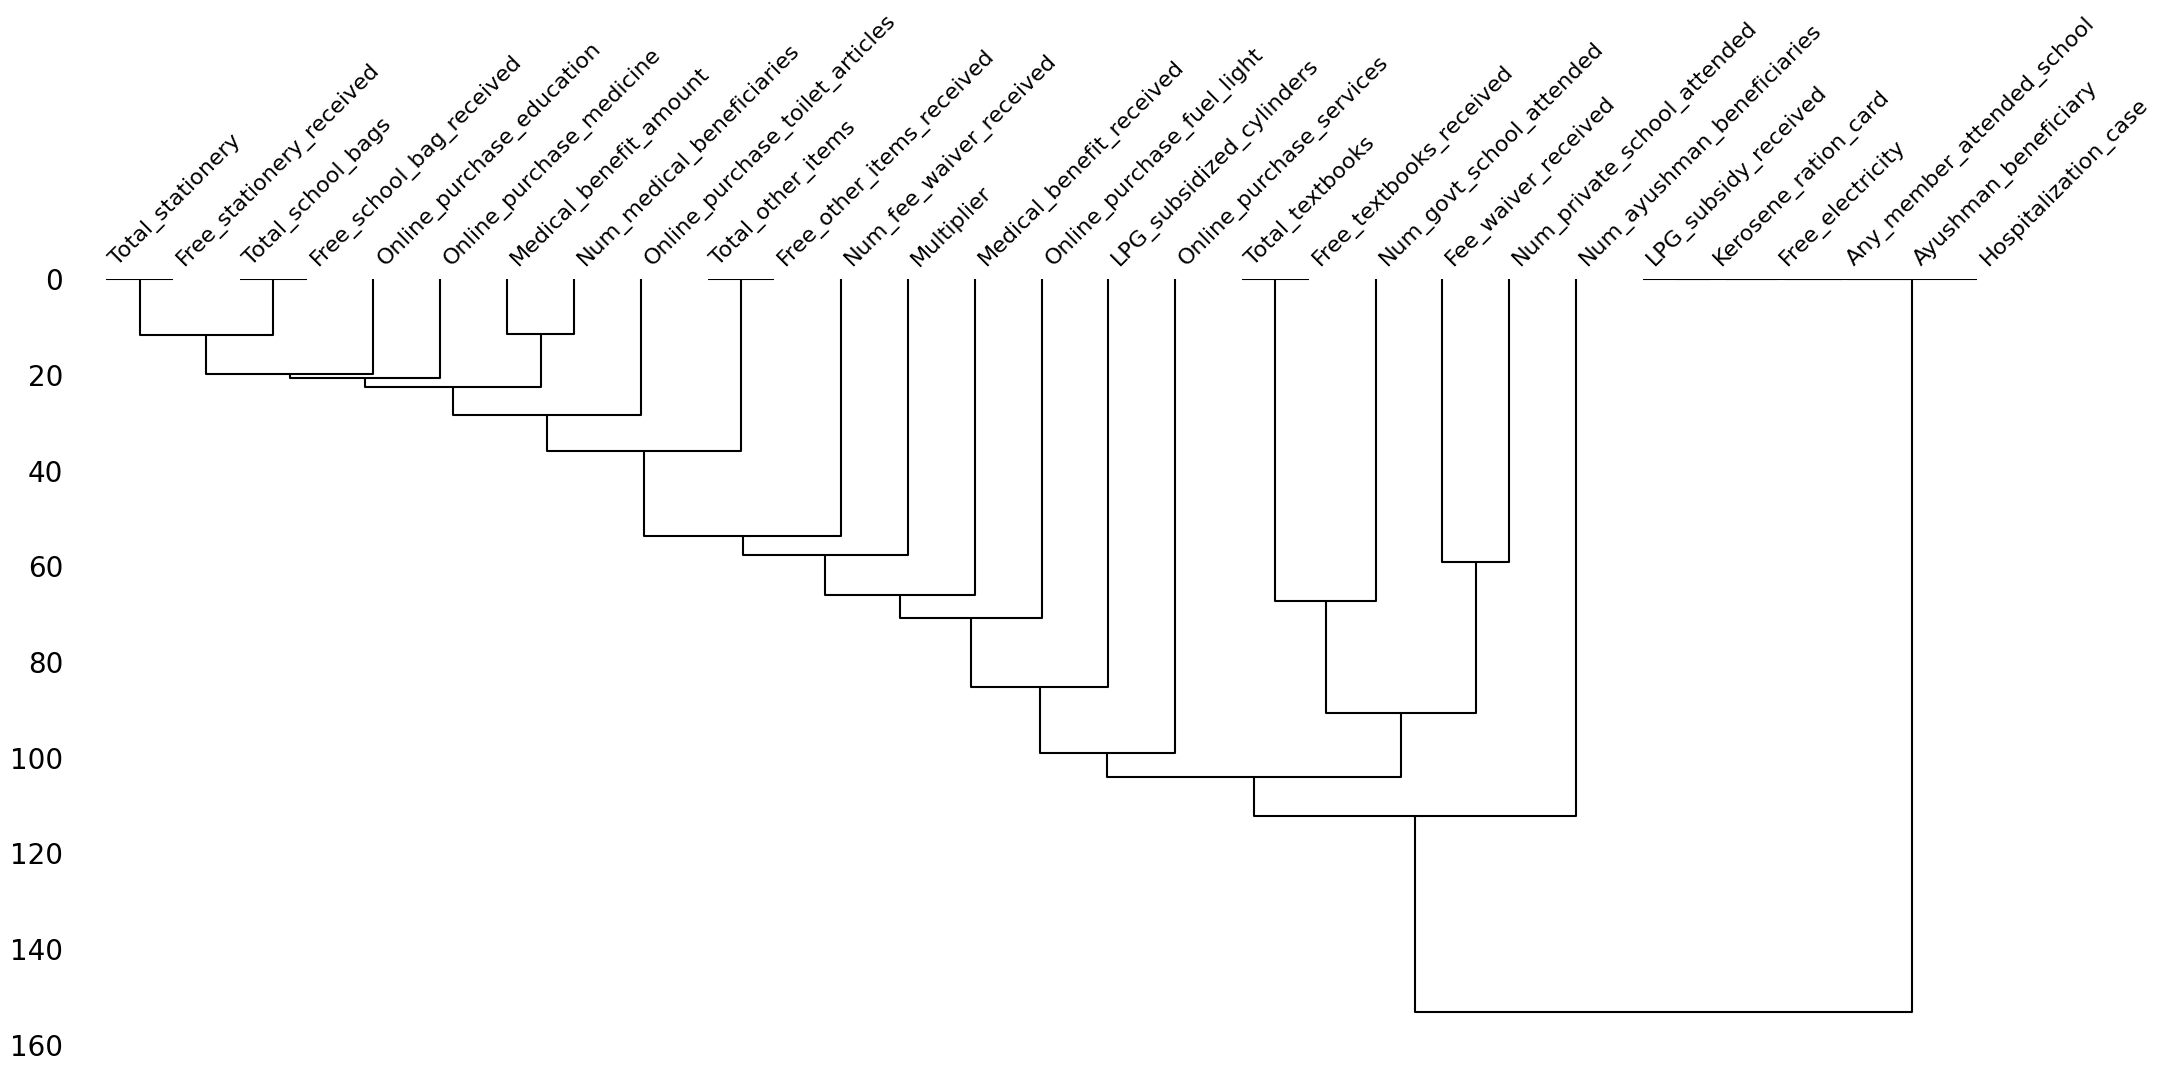

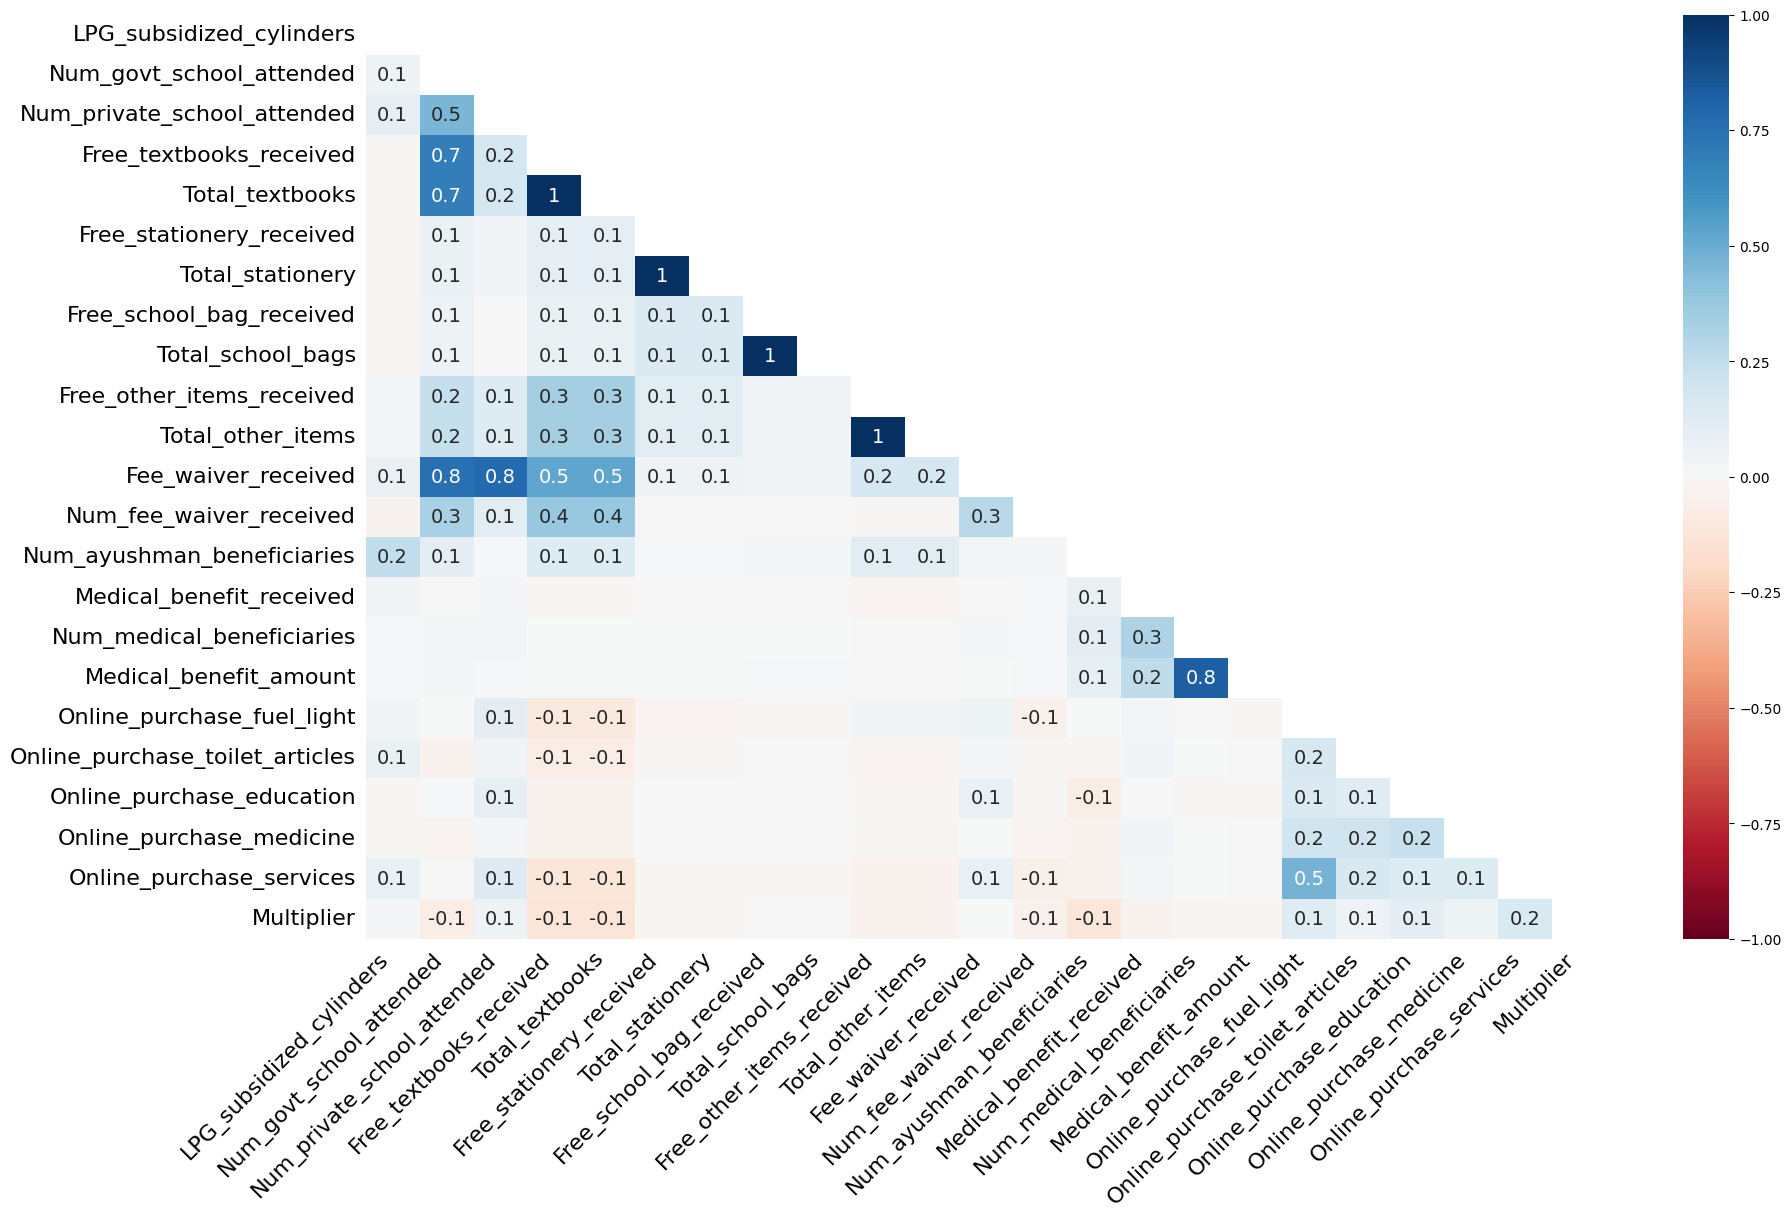

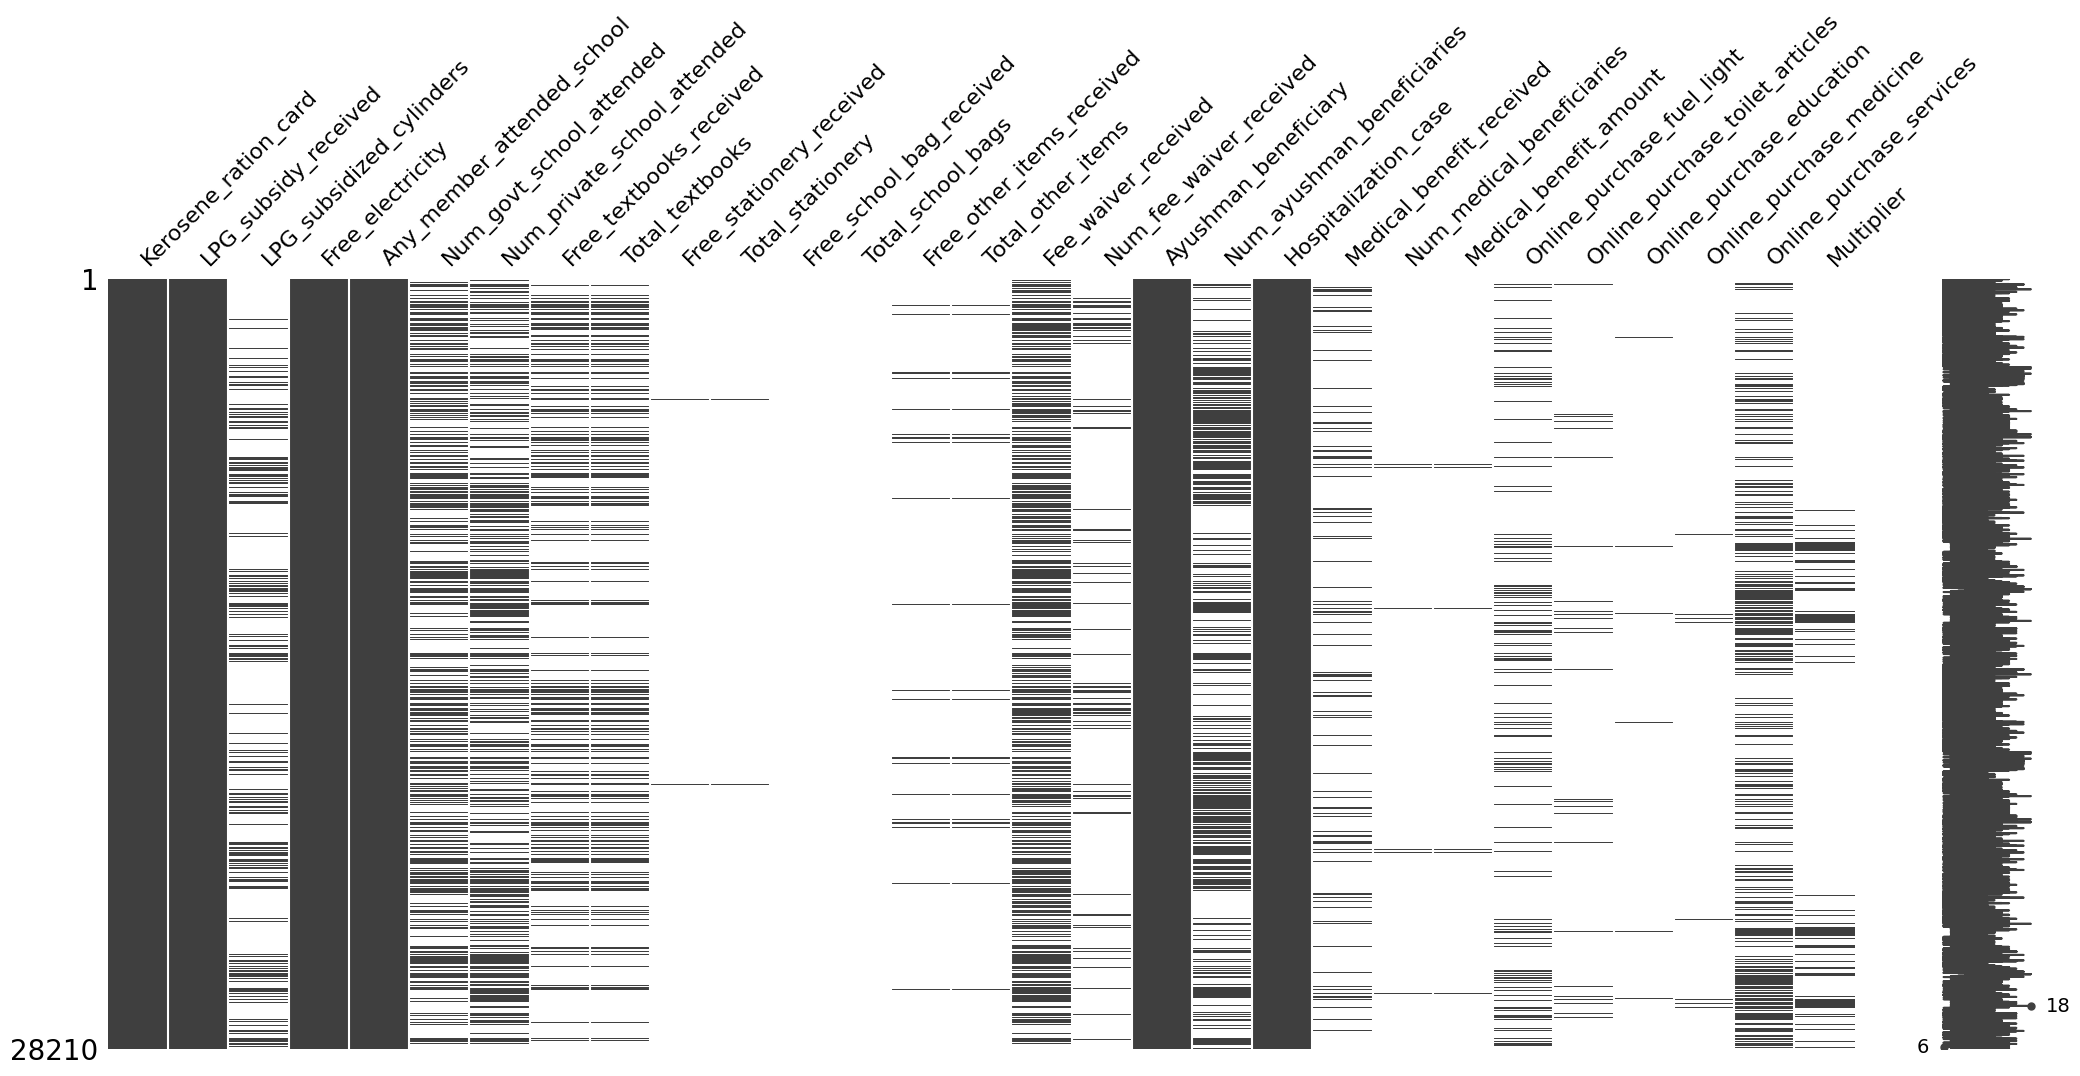

In [2]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-07\data\lev-07_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'Kerosene_ration_card',
'LPG_subsidy_received',
'LPG_subsidized_cylinders',
'Free_electricity',
'Any_member_attended_school',
'Num_govt_school_attended',
'Num_private_school_attended',
'Free_textbooks_received',
'Total_textbooks',
'Free_stationery_received',
'Total_stationery',
'Free_school_bag_received',
'Total_school_bags',
'Free_other_items_received',
'Total_other_items',
'Fee_waiver_received',
'Num_fee_waiver_received',
'Ayushman_beneficiary',
'Num_ayushman_beneficiaries',
'Hospitalization_case',
'Medical_benefit_received',
'Num_medical_beneficiaries',
'Medical_benefit_amount',
'Online_purchase_fuel_light',
'Online_purchase_toilet_articles',
'Online_purchase_education',
'Online_purchase_medicine',
'Online_purchase_services',
'Multiplier',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)